# Human Factors Prediction Model => LSTM(NTSB)

## Import Notebook

In [6]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

def show_report(model):
    print(model.classification_report)

In [8]:
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# ntsb_df = ntsb_df.sample(n=1000, random_state=42)

df = ntsb_df.copy() 

ls_version = 2 # Default version=2
ls_name = 'asrs_ntsb'
ds_name='ntsb'

In [9]:
def call_modal(options):
    dfs = { ds_name: df.copy() }
    model = LSTMModel(dfs, ds_name=ds_name, options=options)
    model.train()

    # 03. Evaluate Model
    evaluate_result = model.evaluate()
    return model

## LSTM(NTSB) + LS(Asrs)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


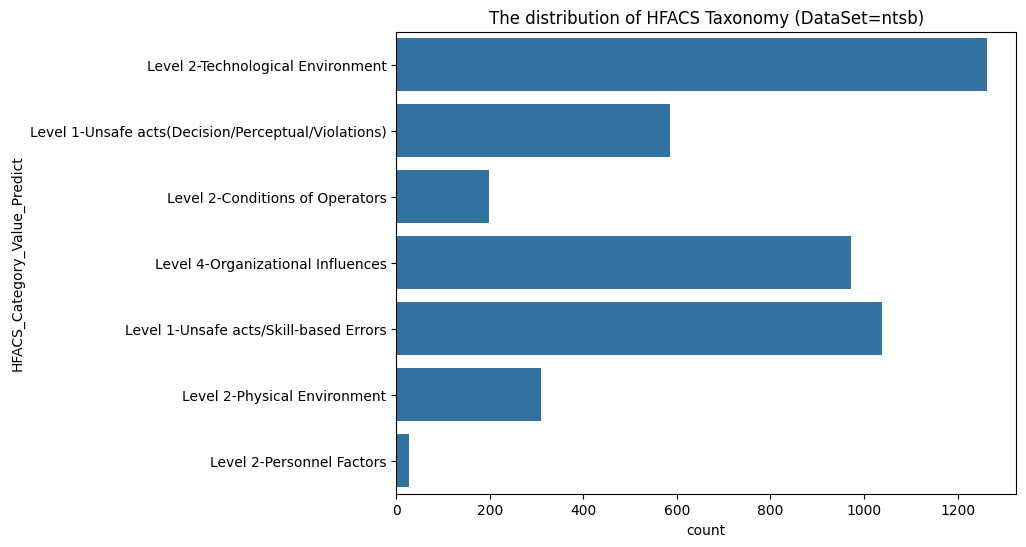

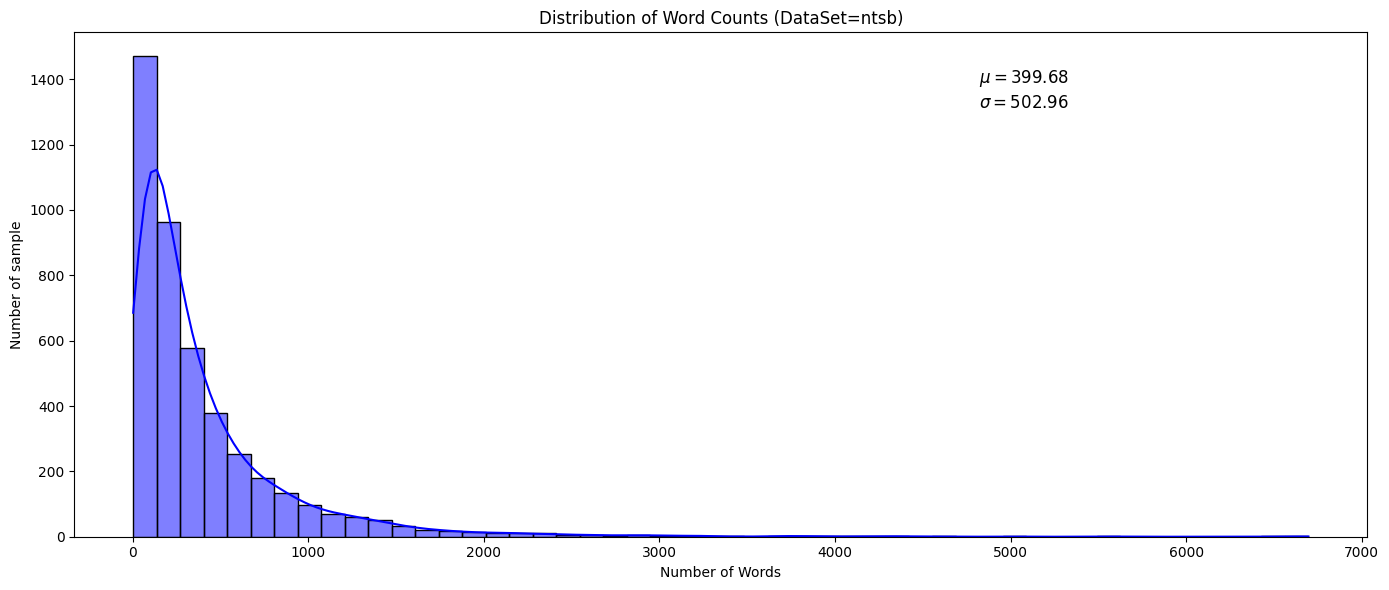

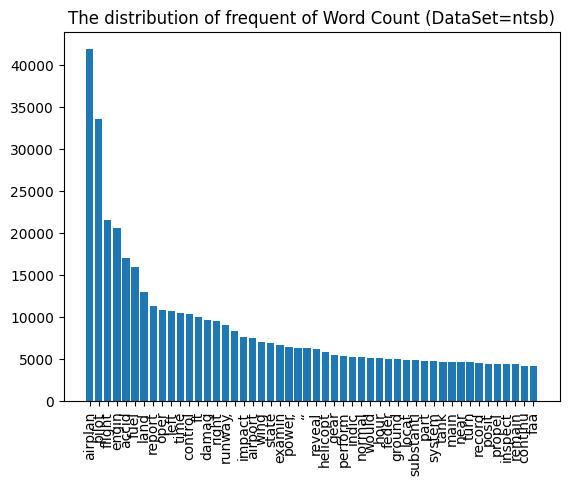

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
Counter({5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155, 3: 23})
Counter({5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155, 3: 23})
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step - accuracy: 0.2278 - loss: 1.9175 - val_accuracy: 0.2955 - val_loss: 1.6598
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.2942 - loss: 1.6740 - val_accuracy: 0.2955 - val_loss: 1.6436
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.2951 - loss: 1.6525 - val_accuracy: 0.2955 - val_loss: 1.6174
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.3144 - loss: 1.6358 - val_accuracy: 0.3494 - val_loss: 1.5663
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.3689 - loss: 1.5419 - val_accuracy: 0.3920 - val_loss: 1.5244
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/s

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step


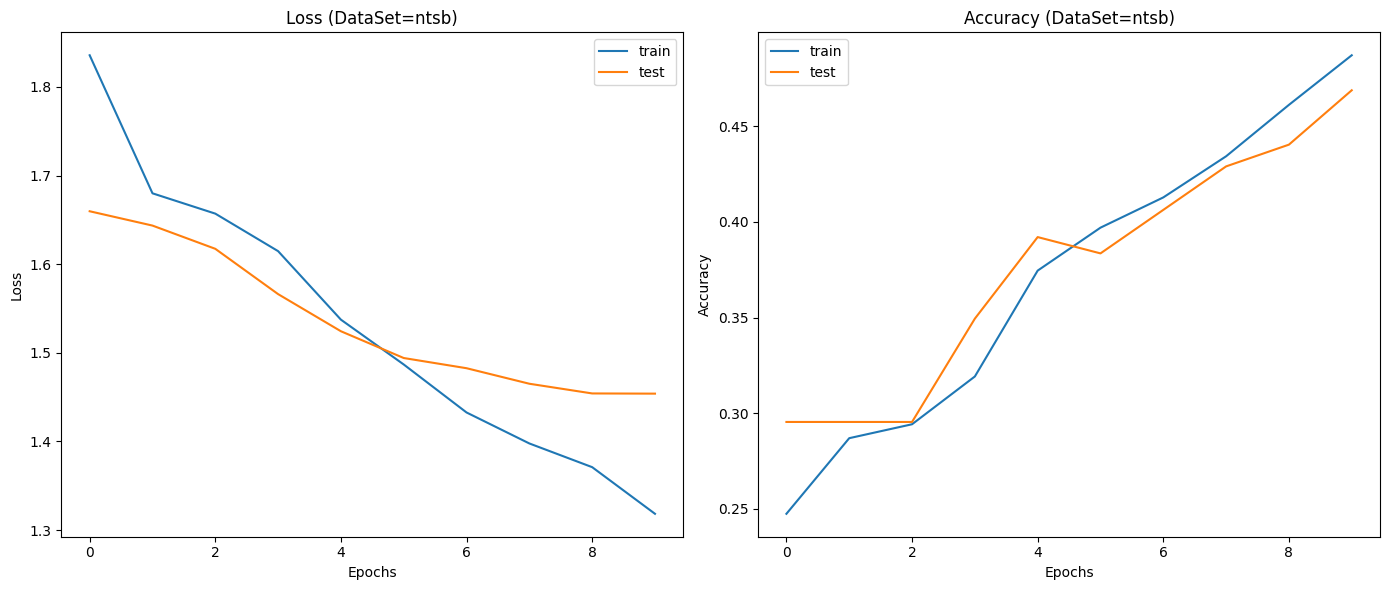

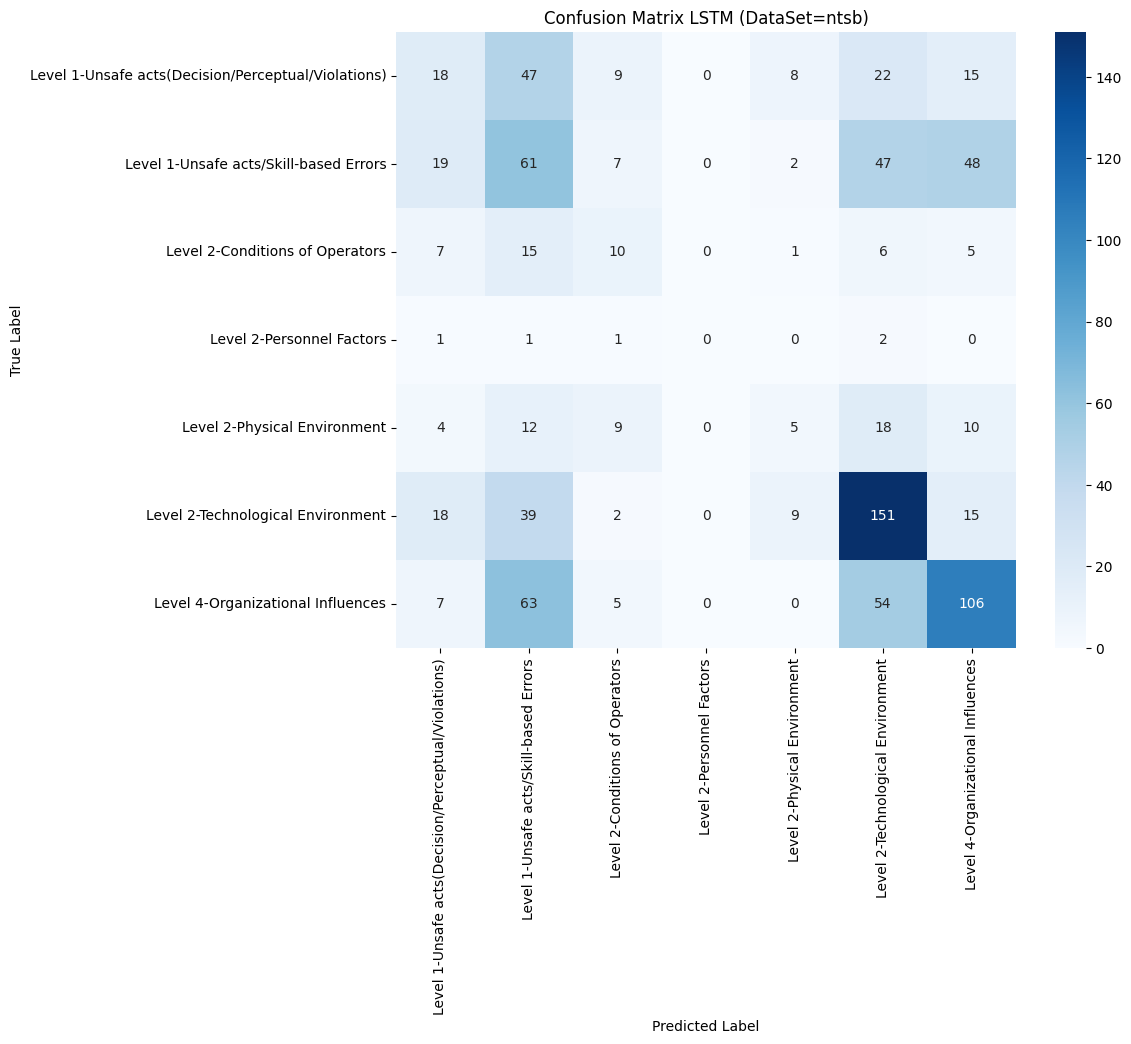

In [10]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model = call_modal(options)

## LSTM(NTSB) + LS(Hybrid) + Class Weight

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


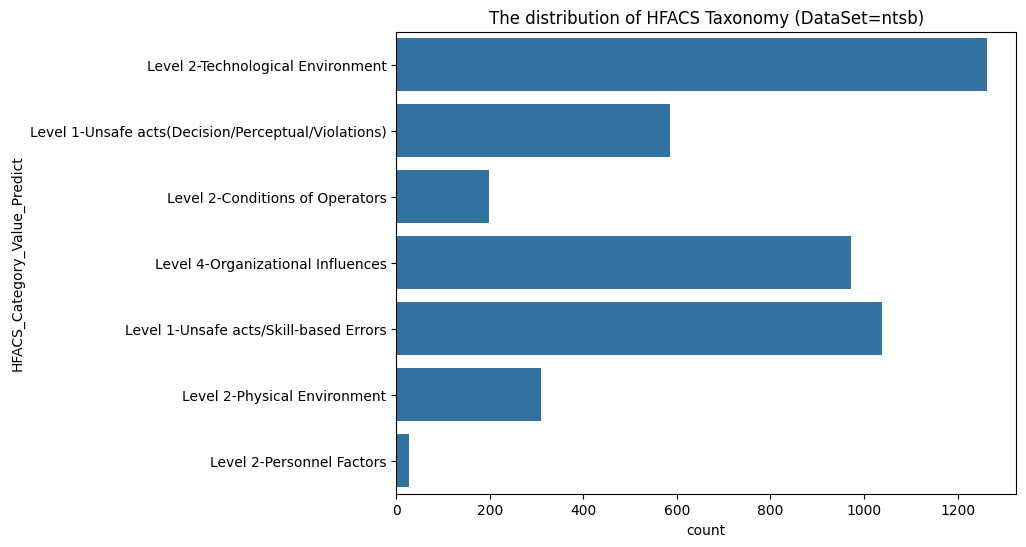

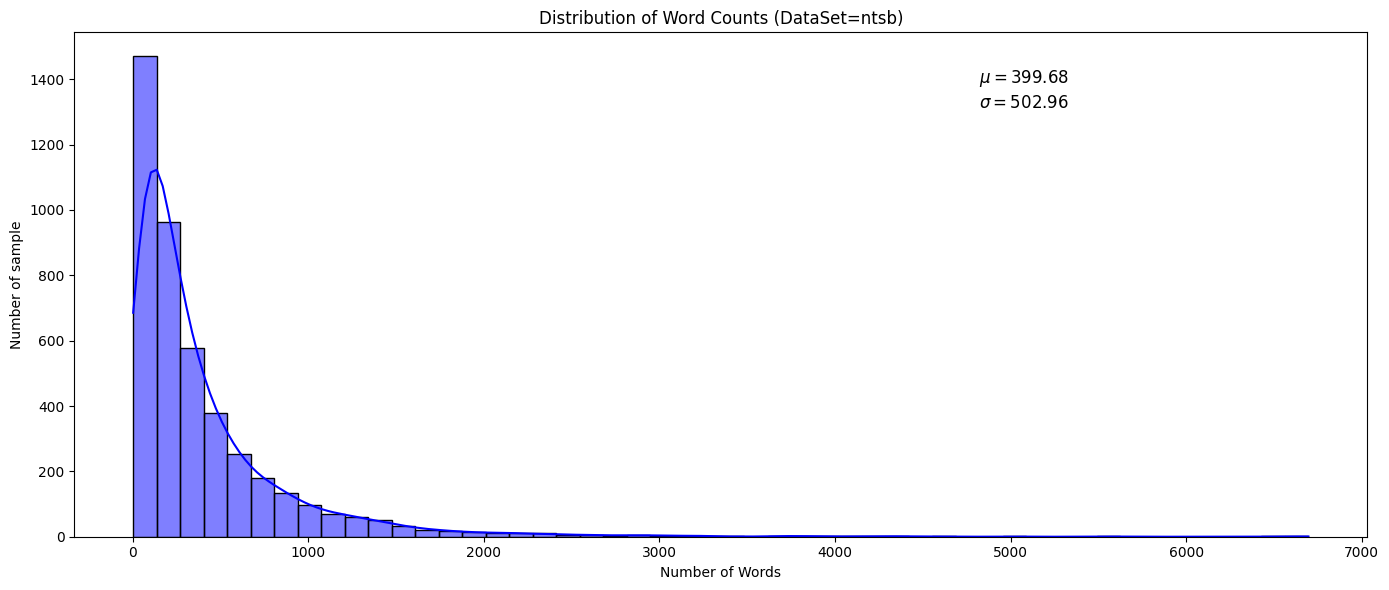

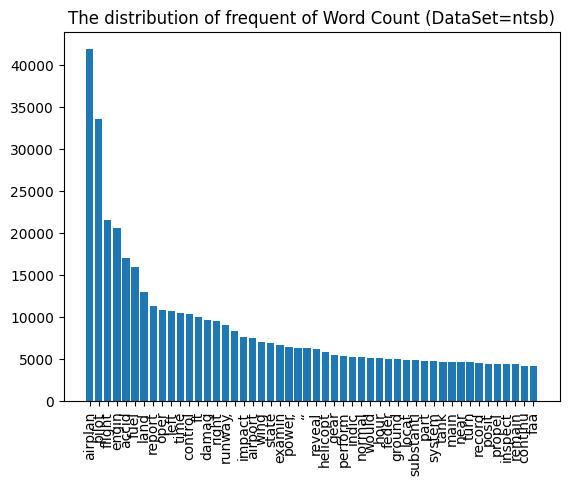

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
Counter({5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155, 3: 23})
Counter({5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155, 3: 23})
{0: 1.0778663396689148, 1: 0.5881565741050518, 2: 3.240552995391705, 3: 21.838509316770185, 4: 1.9931972789115646, 5: 0.4886047804335742, 6: 0.6806039488966318}
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 277ms/step - accuracy: 0.1675 - loss: 1.9845 - val_accuracy: 0.2500 - val_loss: 1.9545
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.2499 - loss: 1.9490 - val_accuracy: 0.2358 - val_loss: 1.9482
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.2411 - loss: 1.9510 - val_accuracy: 0.1449 - val_loss: 1.8721
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.1615 - loss: 1.9854 - val_accuracy: 0.1591 - val_loss: 1.8737
Epoch 5/10
99/99 

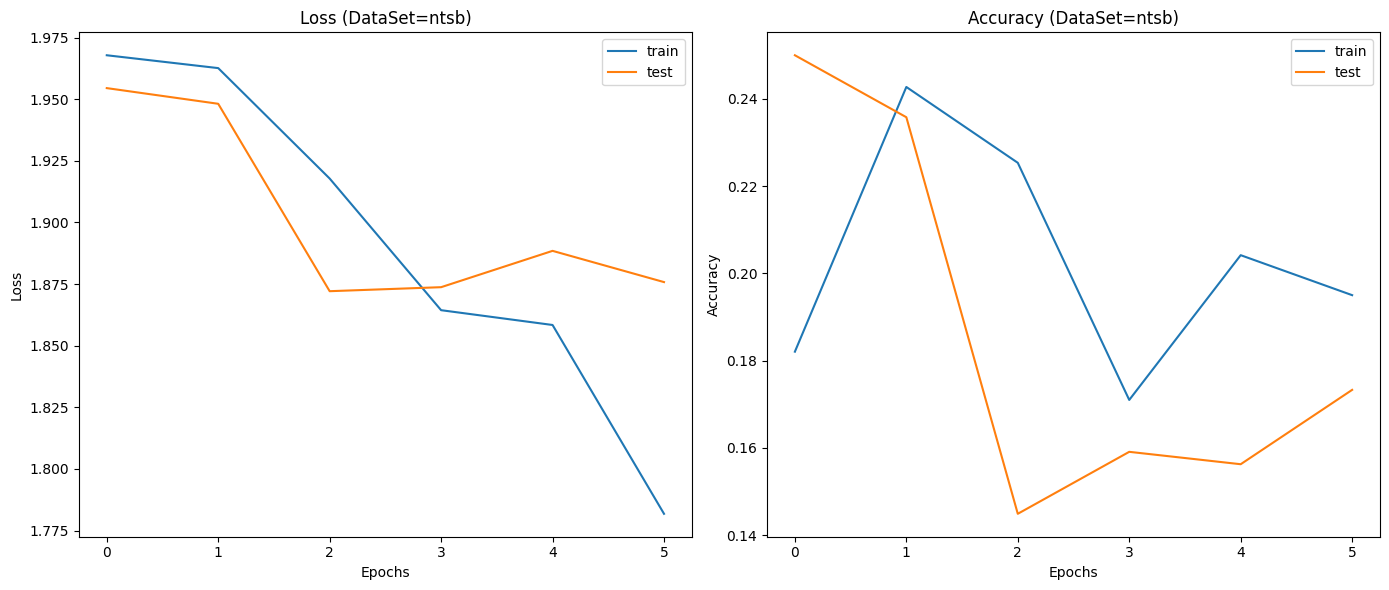

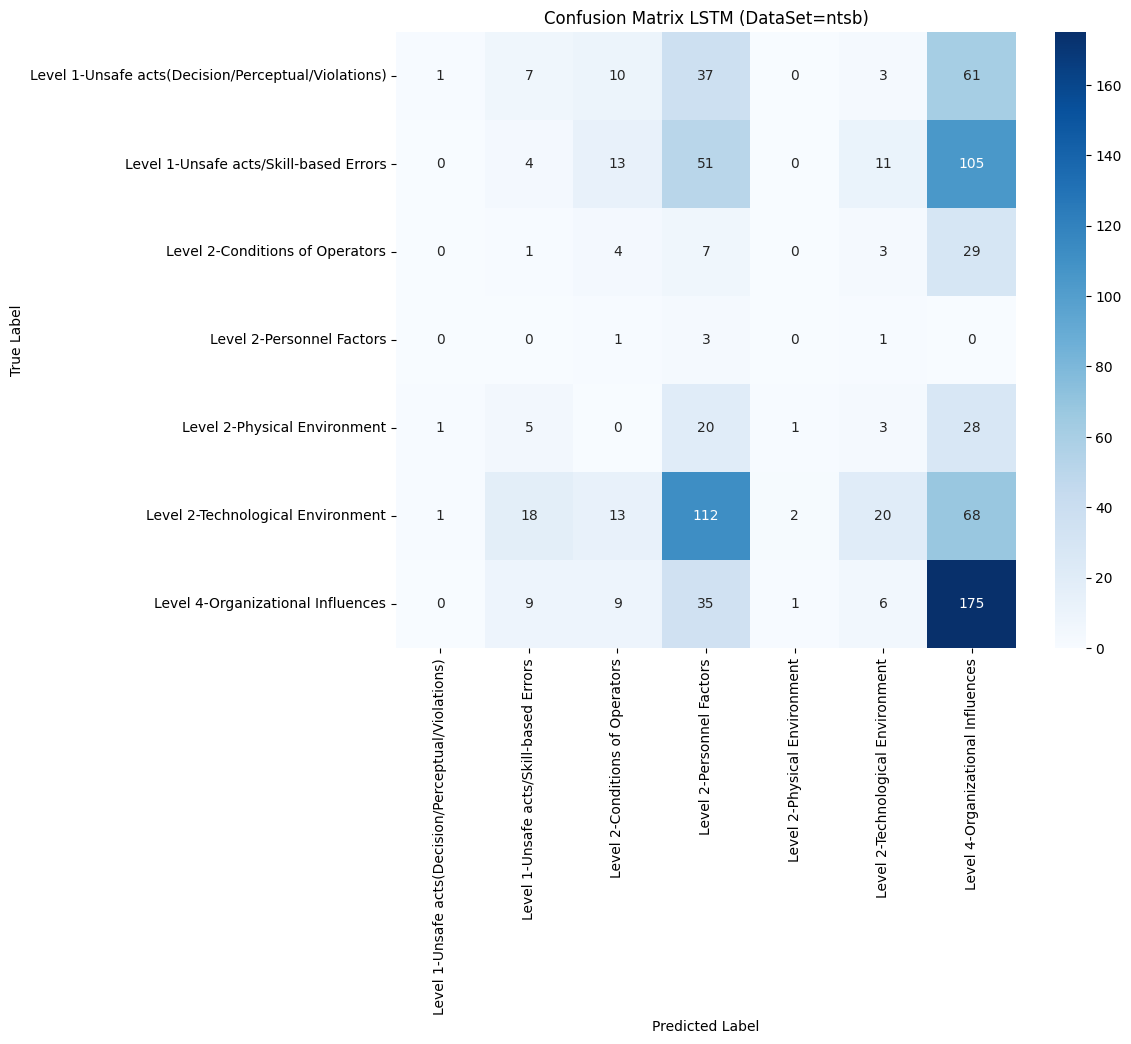

In [11]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": True,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model_weight = call_modal(options)

## LSTM(NTSB) + LS(Hybrid) + SMOTE

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


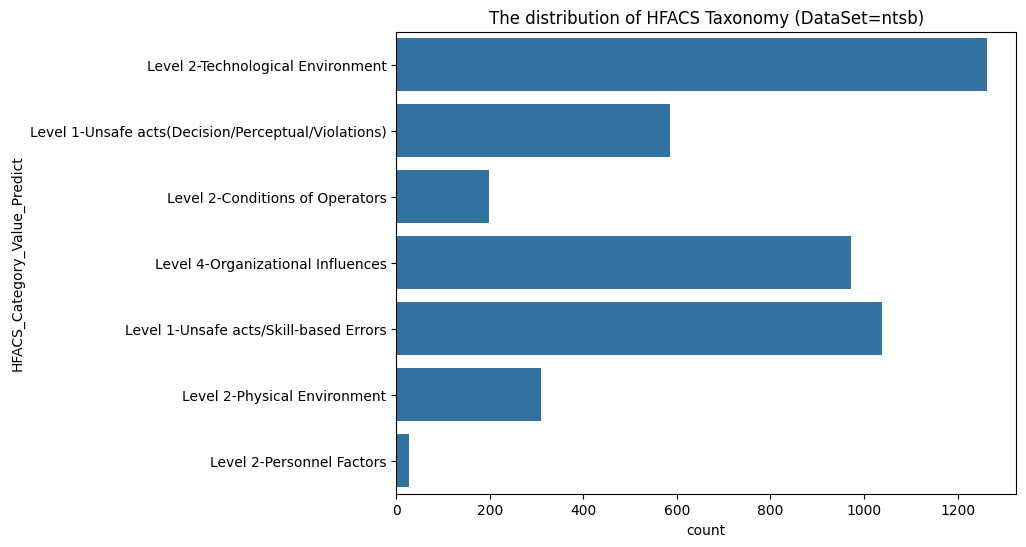

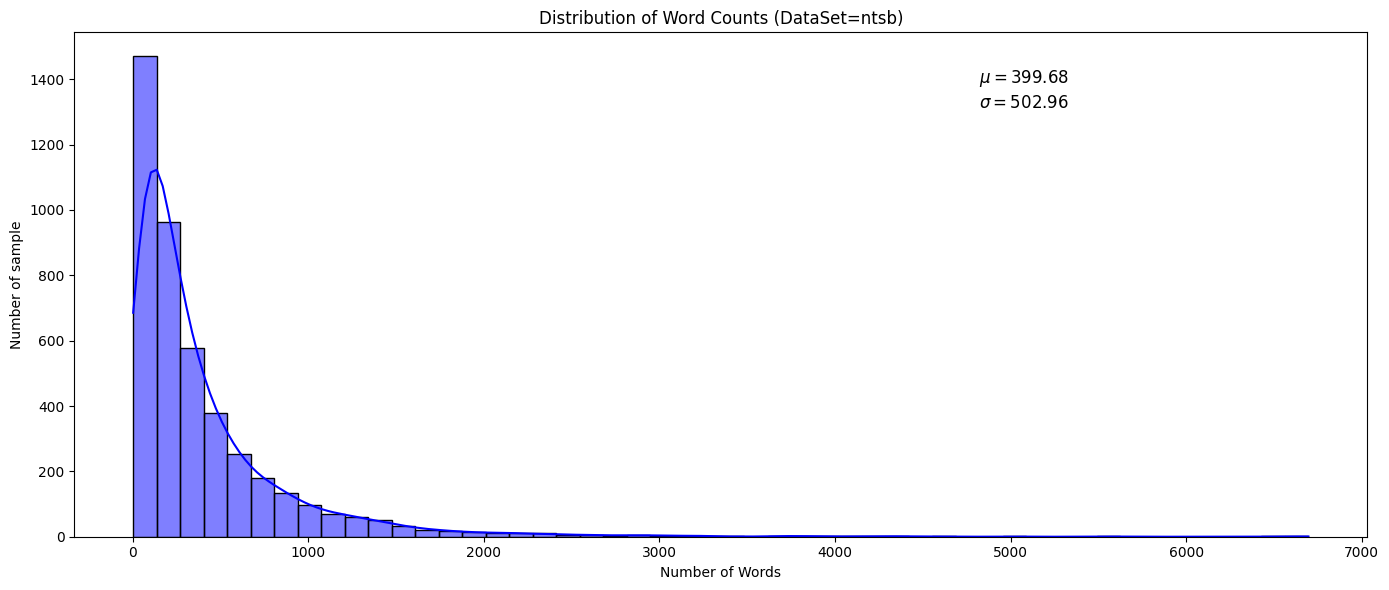

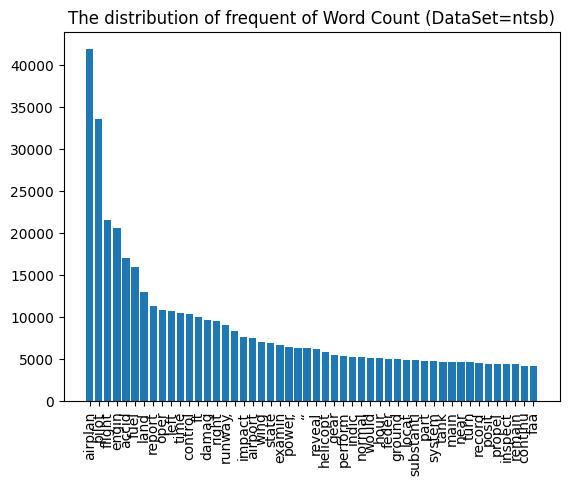

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
Counter({5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155, 3: 23})
Original dataset shape: (3516, 200)
Resampled dataset shape: (7196, 200)
Counter({3: 1028, 5: 1028, 1: 1028, 2: 1028, 6: 1028, 0: 1028, 4: 1028})
Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 66s 302ms/step - accuracy: 0.1695 - loss: 1.9539 - val_accuracy: 0.0056 - val_loss: 2.2680
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 55s 270ms/step - accuracy: 0.2264 - loss: 1.8735 - val_accuracy: 0.1028 - val_loss: 2.2500
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 280ms/step - accuracy: 0.2776 - loss: 1.7788 - val_accuracy: 0.0264 - val_loss: 2.6758
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 62s 307ms/step - accuracy: 0.3281 - loss: 1.6728 - val_accuracy: 0.0278 - val_loss: 2.6179
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 54s 268ms/step - accuracy: 0.3653 - loss: 1.6076 -

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step


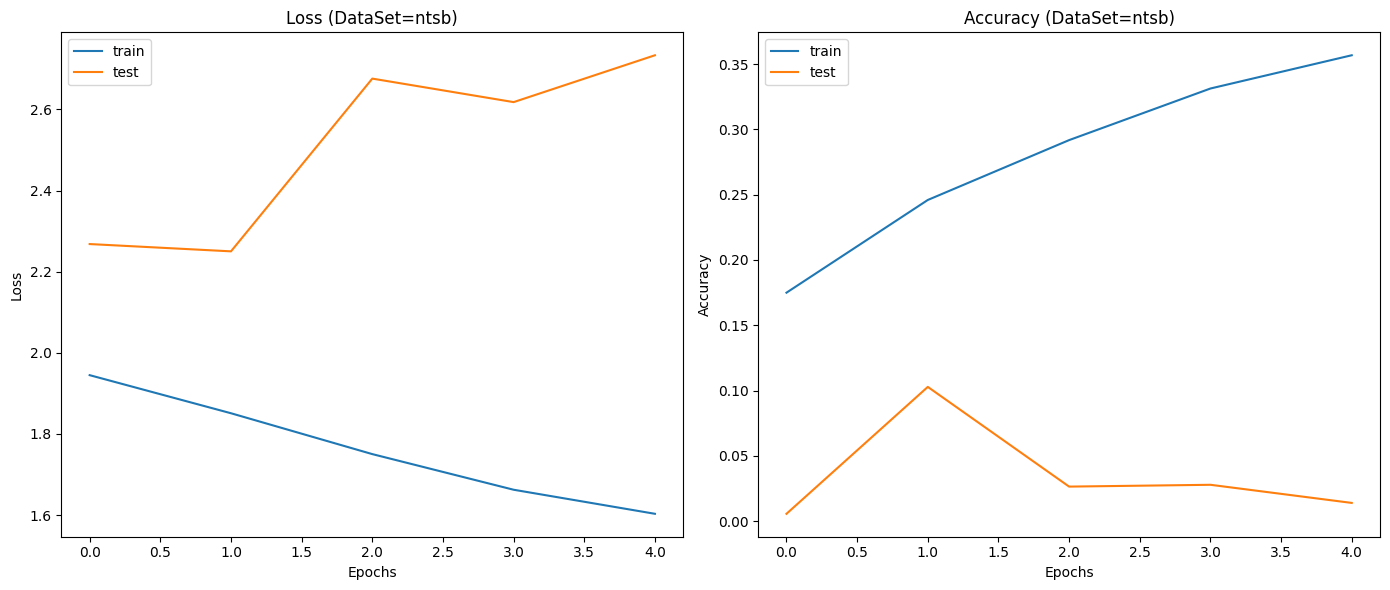

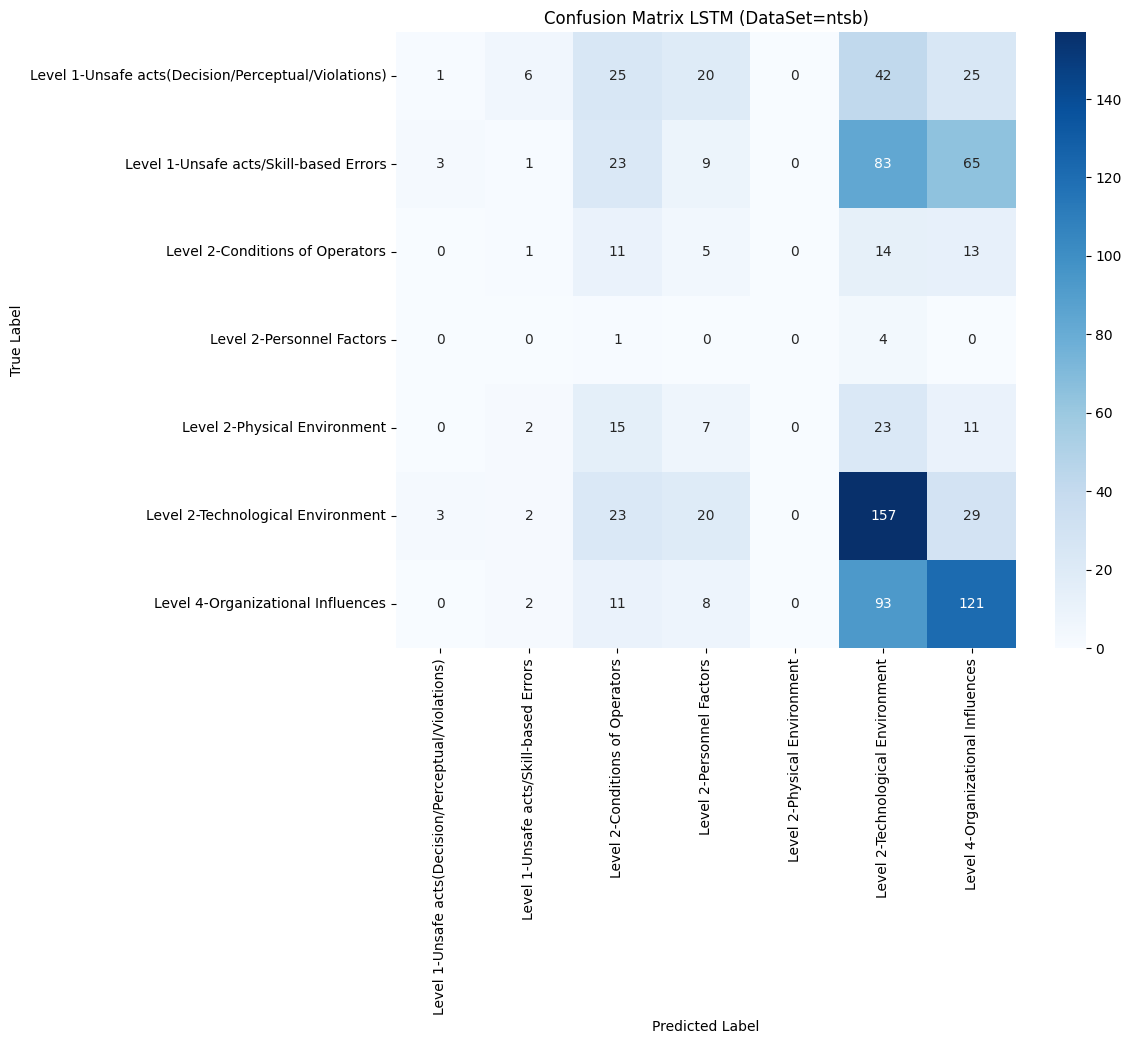

In [12]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": True,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model_smote = call_modal(options)

## LSTM(NTSB) + LS(Hybrid) + ASASYN

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


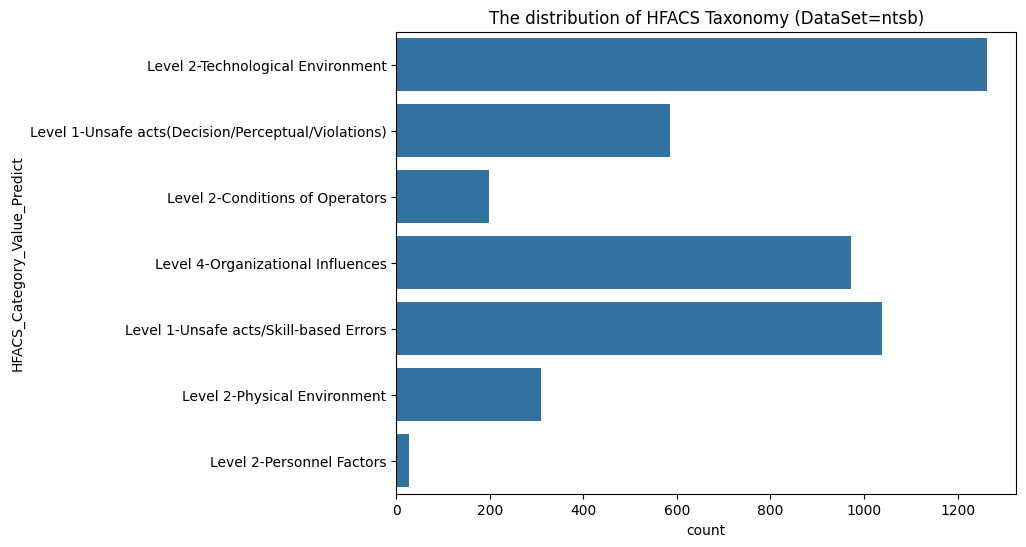

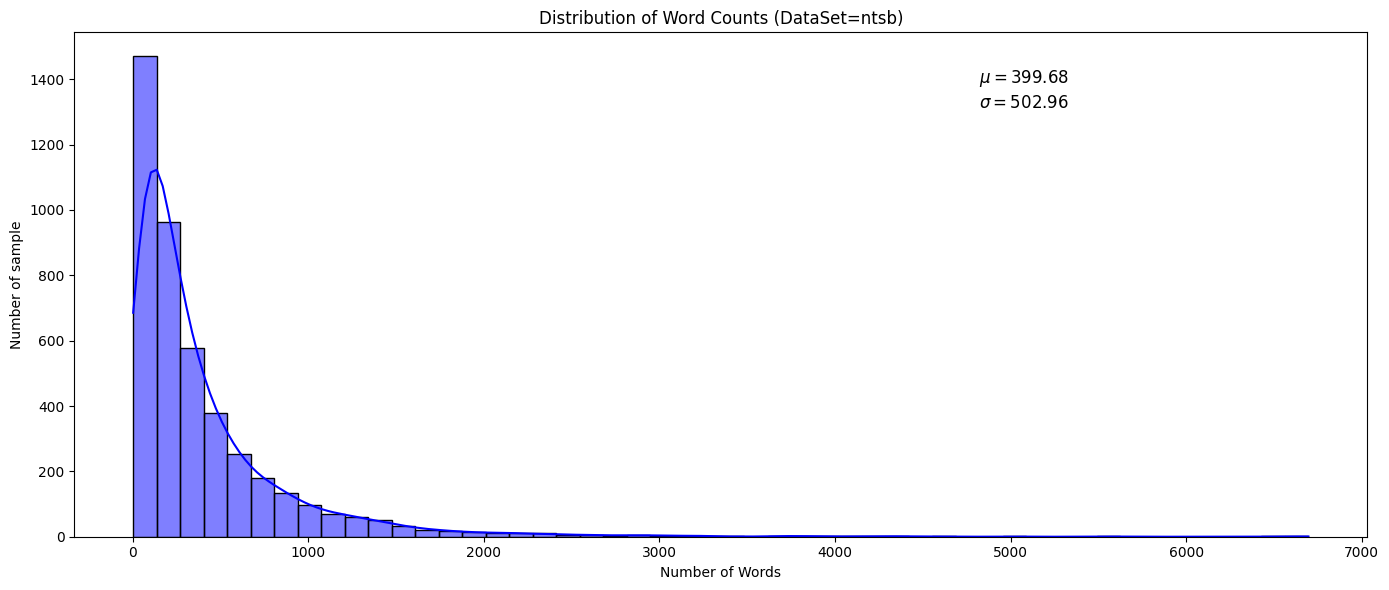

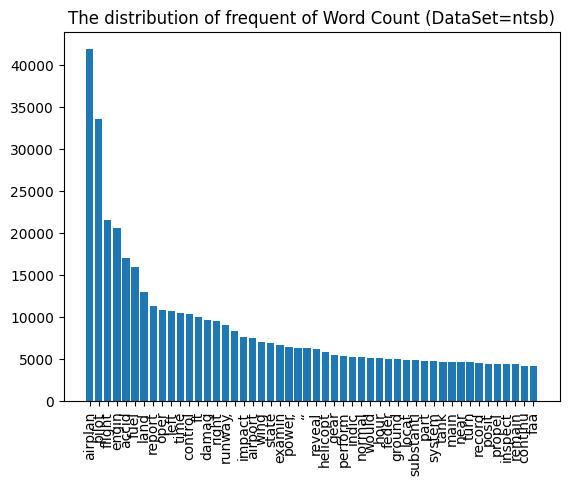

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
Counter({5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155, 3: 23})
Original dataset shape: (3516, 200)
Resampled dataset shape: (4528, 200)
Counter({3: 1035, 5: 1028, 1: 854, 6: 738, 0: 466, 4: 252, 2: 155})
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 0.2151 - loss: 1.9360 - val_accuracy: 0.0000e+00 - val_loss: 1.9622
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 275ms/step - accuracy: 0.2638 - loss: 1.8165 - val_accuracy: 0.0000e+00 - val_loss: 1.9159
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 306ms/step - accuracy: 0.3011 - loss: 1.7487 - val_accuracy: 0.2649 - val_loss: 1.6522
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 37s 289ms/step - accuracy: 0.3595 - loss: 1.6176 - val_accuracy: 0.6578 - val_loss: 1.4759
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 283ms/step - accuracy: 0.4092 - loss: 1.516

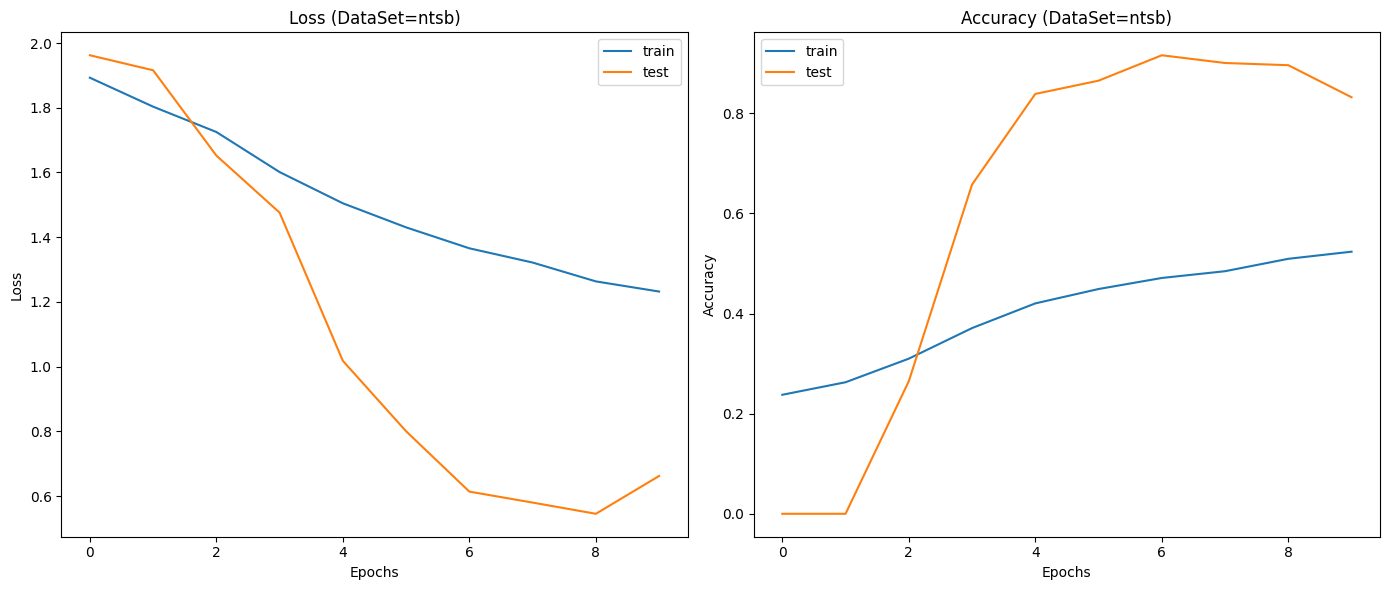

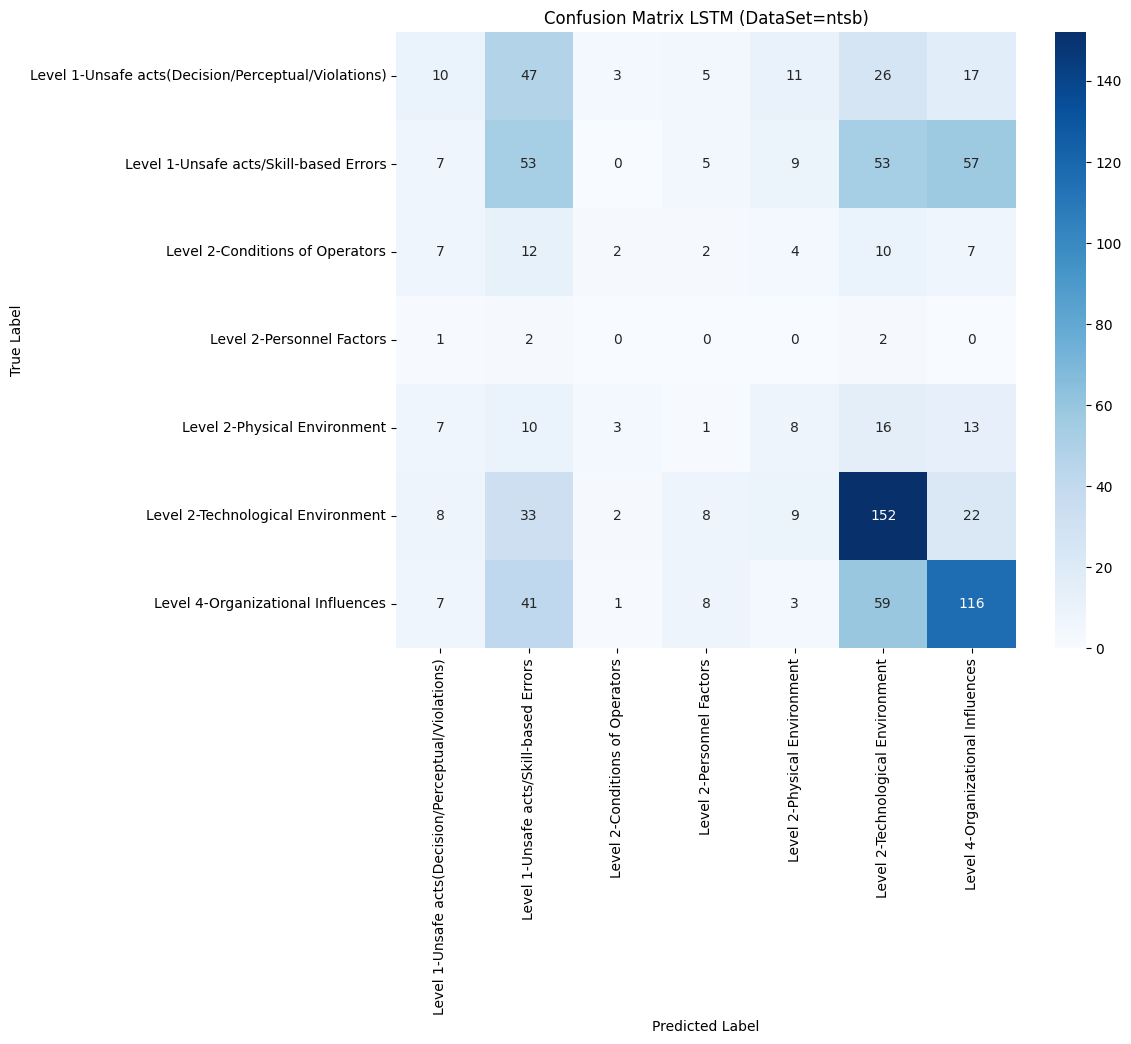

In [13]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": True,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model_asasyn = call_modal(options)

## Summary of Accuracy

In [14]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_accuracy(lstm_model)
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_accuracy(lstm_model_weight)
print('ASRS+LS(Hybrid)+SMOTE=========')
show_accuracy(lstm_model_smote)
print('ASRS+LS(Hybrid)+ASAYN=========')
show_accuracy(lstm_model_asasyn)

ASRS+LS(Hybrid)=========
Accuracy: 39.93
Micro F1 Score: 39.93
Macro F1 Score: 26.86
Weighted F1 Score: 38.64
Hamming Loss: 0.6007
ASRS+LS(Hybrid)+Class Imbalance=========
Accuracy: 23.66
Micro F1 Score: 23.66
Macro F1 Score: 11.90
Weighted F1 Score: 18.75
Hamming Loss: 0.7634
ASRS+LS(Hybrid)+SMOTE=========
Accuracy: 33.11
Micro F1 Score: 33.11
Macro F1 Score: 16.25
Weighted F1 Score: 26.97
Hamming Loss: 0.6689
ASRS+LS(Hybrid)+ASAYN=========
Accuracy: 38.79
Micro F1 Score: 38.79
Macro F1 Score: 23.93
Weighted F1 Score: 36.78
Hamming Loss: 0.6121


In [15]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_report(lstm_model)

ASRS+LS(Hybrid)=========
              precision    recall  f1-score   support

           0       0.24      0.15      0.19       119
           1       0.26      0.33      0.29       184
           2       0.23      0.23      0.23        44
           3       0.00      0.00      0.00         5
           4       0.20      0.09      0.12        58
           5       0.50      0.65      0.57       234
           6       0.53      0.45      0.49       235

    accuracy                           0.40       879
   macro avg       0.28      0.27      0.27       879
weighted avg       0.39      0.40      0.39       879



In [16]:
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_report(lstm_model_weight)

ASRS+LS(Hybrid)+Class Imbalance=========
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       119
           1       0.09      0.02      0.04       184
           2       0.08      0.09      0.09        44
           3       0.01      0.60      0.02         5
           4       0.25      0.02      0.03        58
           5       0.43      0.09      0.14       234
           6       0.38      0.74      0.50       235

    accuracy                           0.24       879
   macro avg       0.22      0.22      0.12       879
weighted avg       0.30      0.24      0.19       879



In [17]:
print('ASRS+LS(Hybrid)+SMOTE=========')
show_report(lstm_model_smote)

ASRS+LS(Hybrid)+SMOTE=========
              precision    recall  f1-score   support

           0       0.14      0.01      0.02       119
           1       0.07      0.01      0.01       184
           2       0.10      0.25      0.14        44
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        58
           5       0.38      0.67      0.48       234
           6       0.46      0.51      0.48       235

    accuracy                           0.33       879
   macro avg       0.16      0.21      0.16       879
weighted avg       0.26      0.33      0.27       879



In [18]:
print('ASRS+LS(Hybrid)+ASAYN=========')
show_report(lstm_model_asasyn)

ASRS+LS(Hybrid)+ASAYN=========
              precision    recall  f1-score   support

           0       0.21      0.08      0.12       119
           1       0.27      0.29      0.28       184
           2       0.18      0.05      0.07        44
           3       0.00      0.00      0.00         5
           4       0.18      0.14      0.16        58
           5       0.48      0.65      0.55       234
           6       0.50      0.49      0.50       235

    accuracy                           0.39       879
   macro avg       0.26      0.24      0.24       879
weighted avg       0.37      0.39      0.37       879

